## Content
  - [1. Import Libraries](#1-Import-Libraries)
  - [2. Get Data](#2-Get-Data)
  - [3. Data Cleaning and Combining](#3-Data-Cleaning-and-Combining)
  - [4. Remove Duplicates](#4-Remove-Duplicates)
  - [5. Export Data](#5-Export-Data)
  - [6. Plot Score Distribution](#6-Plot-Score-Distribution)

A search on the Internet revealed another dataset containing essays. The plan is to augment our existing dataset by oversampling essays with the underrepresented scores of 1, 5, and 6.

Shape of main data set: (17307, 3)
Shape of additional data set: (11825, 3)
Shape of combined data set before removing duplicates: (29132, 3)
Shape of combined data set after removing duplicates: (22567, 3)
Exporting file
file exported


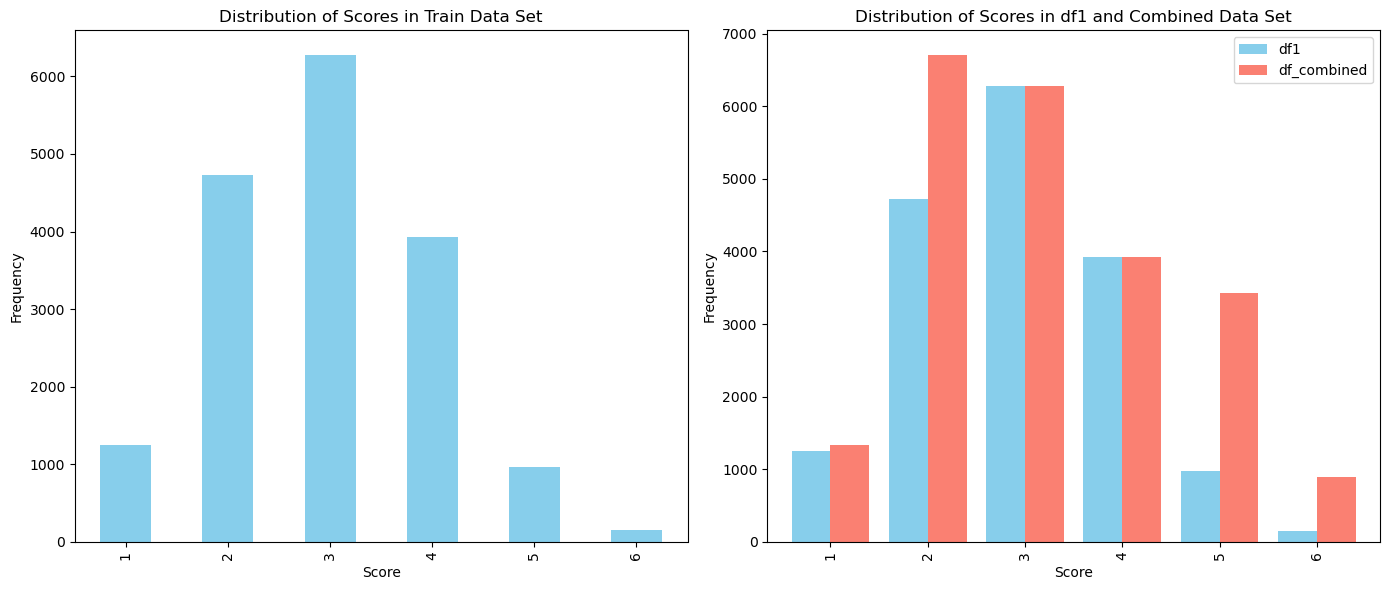

In [7]:
# 1. Import Libraries
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_csv('train.csv') # initial data set
df2 = pd.read_csv('persuade_2.0_human_scores_demo_id_github.csv') # another data set

# 3. Data Cleaning and Combining
df3 = df2[(df2['holistic_essay_score'].isin([1, 2, 5, 6])) | (df2['prompt_name'].isin(["The Face on Mars", "A Cowboy Who Rode the Waves"]))]
df3 = df3[['essay_id_comp', 'full_text', 'holistic_essay_score']]
df3.columns = ['essay_id', 'full_text', 'score']
df1 = df1[['essay_id', 'full_text', 'score']]

print("Shape of main data set:", df1.shape)
print("Shape of additional data set:", df3.shape)

combined_df = pd.concat([df1, df3], ignore_index=True)

# 4. Remove Duplicates
duplicates = combined_df[combined_df.duplicated(subset='full_text', keep=False)]
combined_df_no_duplicates = combined_df.drop_duplicates(subset='full_text', keep='first')

print("Shape of combined data set before removing duplicates:", combined_df.shape)
print("Shape of combined data set after removing duplicates:", combined_df_no_duplicates.shape)

# 5. Export Data
df = combined_df_no_duplicates[['essay_id', 'full_text', 'score']]
print("Exporting file")
df.to_csv('oversampled_data_set.csv', index=False)
print("file exported")

# 6. Plot Score Distribution
df1_score_counts = df1['score'].value_counts().sort_index()
df_combined_score_counts = df['score'].value_counts().sort_index()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Train Data Set
df1_score_counts.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Scores in Train Data Set')
axes[0].set_xlabel('Score')
axes[0].set_ylabel('Frequency')

# Combined Data Set
score_counts = pd.DataFrame({
    'df1': df1_score_counts,
    'df_combined': df_combined_score_counts
}).fillna(0)
score_counts.plot(kind='bar', ax=axes[1], width=0.8, color=['skyblue', 'salmon'])
axes[1].set_title('Distribution of Scores in df1 and Combined Data Set')
axes[1].set_xlabel('Score')
axes[1].set_ylabel('Frequency')
axes[1].legend(['df1', 'df_combined'])

plt.tight_layout()
plt.savefig('score_distribution_plot_exp_2.png')
plt.show()


In [8]:
df.head()

,essay_id,full_text,score
0,000d118,Many people have car where they live. The thin...,3
1,000fe60,I am a scientist at NASA that is discussing th...,3
2,001ab80,People always wish they had the same technolog...,4
3,001bdc0,"We all heard about Venus, the planet without a...",4
4,002ba53,"Dear, State Senator\n\nThis is a letter to arg...",3


In [11]:
df.shape

(22567, 3)